### Load the data - for the upcoming exercises we will only use the english dataset

In [1]:
import pandas as pd

classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

sample = train_en.sample(5000)
labels = [classes_en[int(row["Label"])] for i, row in sample.iterrows()]
docs = [row["Article"] for i, row in sample.iterrows()]

# **Feature Representations**

### We have already worked with TF-IDF with Gensim, for this exercise we will generate the TF-IDF matrix with sklearn

[https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [2]:
from nltk.corpus import stopwords as nltkStopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

stopwords_en = list(nltkStopwords.words("english"))

tfidf_vectorizer = TfidfVectorizer(strip_accents = "unicode",
                                   stop_words = stopwords_en)

X_tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_features_names = tfidf_vectorizer.get_feature_names_out()
print(X_tfidf.shape)
print(tfidf_features_names.shape)

(5000, 16310)
(16310,)


In [3]:
tfidf = pd.DataFrame(X_tfidf.A, columns = tfidf_features_names)
tfidf["Label"] = labels
# tfidf.to_csv("tfidf_en.csv")

In [4]:
tfidf.head()

,00,000,000rpm,000th,01,02,03,04,05,06,...,zogby,zombie,zone,zook,zorilla,zoysa,zurich,zvonareva,zygmunt,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,World
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,World
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,World
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sci/Tech


### Another way of representing text is using a word count matrix which consists just of the absolute term frequencies

[https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [5]:
count_vectorizer = CountVectorizer(strip_accents = "unicode",
                                   stop_words = stopwords_en)

X_counts = count_vectorizer.fit_transform(docs)
counts_features_names = count_vectorizer.get_feature_names_out()
print(X_counts.shape)
print(counts_features_names.shape)

(5000, 16310)
(16310,)


In [6]:
counts = pd.DataFrame(X_counts.A, columns = counts_features_names)
counts["Label"] = labels
# counts.to_csv("counts_en.csv")

In [7]:
counts.head()

,00,000,000rpm,000th,01,02,03,04,05,06,...,zogby,zombie,zone,zook,zorilla,zoysa,zurich,zvonareva,zygmunt,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Business
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,World
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,World
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,World
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sci/Tech


### Last but not least we can also use embeddings like Word2Vec or Doc2Vec to represent our documents

You can train these embeddings with your own data by yourself e.g. as described here [https://www.tensorflow.org/tutorials/text/word2vec](https://www.tensorflow.org/tutorials/text/word2vec)  
or you use a pre-trained model like spaCy (remember our first exercise).

Since creating these embeddings may take some time, I did that beforehand but this is the code to do so:

```python
import spacy
import numpy as np
nlp = spacy.load("en_core_web_lg")
doc2vec = [nlp(doc).vector for doc in docs]
vectors = np.array(doc2vec)
vec_space = pd.DataFrame(vectors)
vec_space["Label"] = labels
vec_space.to_csv("doc2vec_en.csv")
```

Loading the document vectors:

In [8]:
vec_space = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/develop/data/Doc2Vec/doc2vec_en.csv", index_col = 0)
X_doc2vec = vec_space.loc[:, vec_space.columns != "Label"].values
Y_doc2vec = vec_space["Label"].values
print(X_doc2vec.shape)
print(Y_doc2vec.shape)

(5000, 300)
(5000,)


# **Clustering**

Each of the above feature represenations can be used for both clustering and classification. We are going to use kMeans clustering in the following and assess the quality of our clusters using silhoutte plots.

You should:
- Read the documentation about kMeans in sklearn [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Try out different numbers of clusters
- Try out the different feature represenations
- What works well and what doesn't work well?
- Which distance metric does sklearn's implemenation of kMeans use?

A function to plot the silhouette plot is given. More about silhouette plots can be found here [https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

In [9]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = 4, random_state = 42)
cluster_labels = clusterer.fit_predict(X_tfidf)

In [10]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette_plot(X, cluster_labels):
    n_clusters = len(set(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Silhouette Avg.:", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    fig, (ax1) = plt.subplots(1, 1)
    # ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 100])
    y_lower = 100
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 100

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    #ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

Silhouette Avg.: 0.004766580760784394


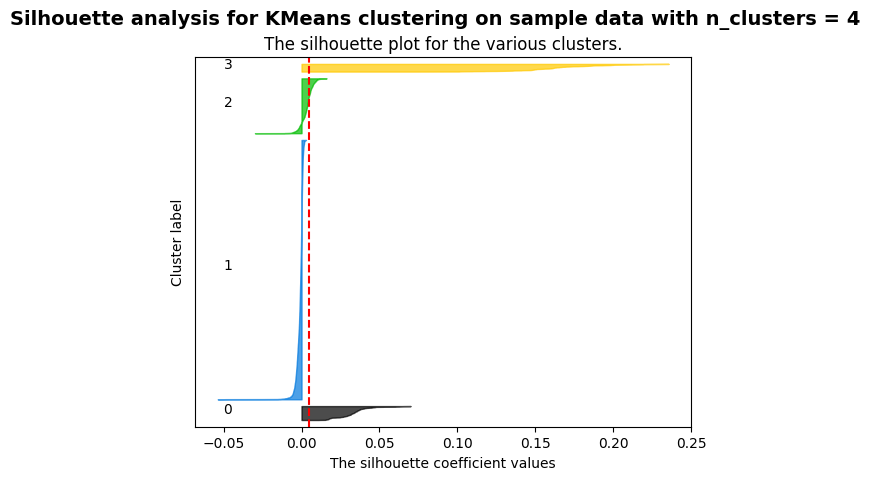

In [11]:
silhouette_plot(X_tfidf, cluster_labels)